In [90]:
import tensorflow as tf
import os

In [91]:
import cv2
import imghdr

In [92]:
!wget https://drive.google.com/drive/folders/1LNlhZjcjrP_bo9ZgEyk-mf0izKfKn80f?usp=share_link

--2023-03-09 14:47:12--  https://drive.google.com/drive/folders/1LNlhZjcjrP_bo9ZgEyk-mf0izKfKn80f?usp=share_link
Resolving drive.google.com (drive.google.com)... 64.233.183.102, 64.233.183.113, 64.233.183.139, ...
Connecting to drive.google.com (drive.google.com)|64.233.183.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1LNlhZjcjrP_bo9ZgEyk-mf0izKfKn80f?usp=share_link.1’

1LNlhZjcjrP_bo9ZgEy     [ <=>                ] 229.61K  --.-KB/s    in 0.1s    

2023-03-09 14:47:12 (1.57 MB/s) - ‘1LNlhZjcjrP_bo9ZgEyk-mf0izKfKn80f?usp=share_link.1’ saved [235118]



In [93]:
data_dir="d@p"

In [94]:
extns=['jpeg','jpg','png','bmp']

In [95]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in extns: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            

In [96]:

import numpy as np
from matplotlib import pyplot as plt

In [97]:
data = tf.keras.utils.image_dataset_from_directory('d@p')

Found 1342 files belonging to 3 classes.


In [98]:
classes=data.class_names

In [99]:
import numpy as np
from matplotlib import pyplot as plt


In [100]:
data_iterator = data.as_numpy_iterator()

In [101]:
batch = data_iterator.next()

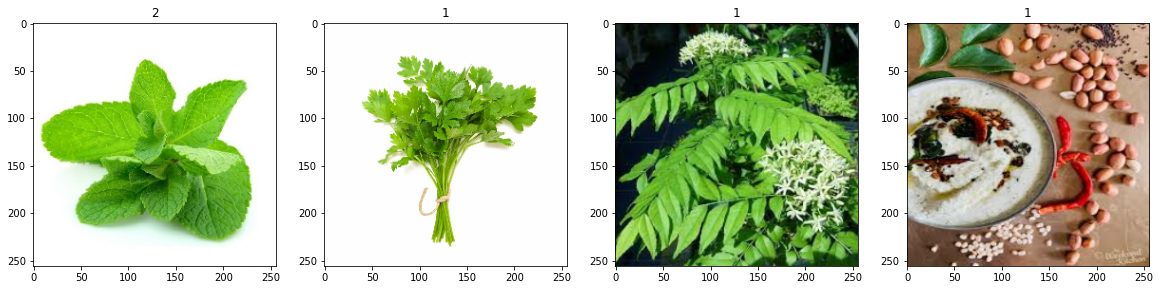

In [102]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [103]:
data = data.map(lambda x,y: (x/255, y))

In [104]:
data.as_numpy_iterator().next()

(array([[[[0.8328173 , 0.8301212 , 0.8596555 ],
          [0.82602346, 0.80249405, 0.857396  ],
          [0.8172966 , 0.7968003 , 0.8486692 ],
          ...,
          [0.75164104, 0.64642215, 0.61090684],
          [0.72769606, 0.6139706 , 0.58259803],
          [0.7361424 , 0.6097637 , 0.5813017 ]],
 
         [[0.82400334, 0.8206945 , 0.85206705],
          [0.84270835, 0.8341663 , 0.87246954],
          [0.806137  , 0.81915784, 0.826439  ],
          ...,
          [0.7442402 , 0.6501225 , 0.61090684],
          [0.7480699 , 0.63434434, 0.6029718 ],
          [0.7182579 , 0.60061085, 0.5692383 ]],
 
         [[0.827968  , 0.82012486, 0.87110525],
          [0.8197706 , 0.8288191 , 0.8511432 ],
          [0.78074545, 0.8438888 , 0.7837814 ],
          ...,
          [0.74120426, 0.6566454 , 0.61350816],
          [0.74100316, 0.6468855 , 0.60766983],
          [0.7286286 , 0.62152076, 0.5868394 ]],
 
         ...,
 
         [[0.8993566 , 0.950337  , 0.9738664 ],
          [0.93863

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [108]:
model = Sequential()

In [109]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [110]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [112]:
logdir='logs'

In [113]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [114]:

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
29/29 [==============================] - 7s 164ms/step - loss: -3481.1277 - accuracy: 0.5388 - val_loss: -26719.2285 - val_accuracy: 0.5273
Epoch 2/20
29/29 [==============================] - 7s 213ms/step - loss: -368251.0938 - accuracy: 0.5571 - val_loss: -1512367.3750 - val_accuracy: 0.5625
Epoch 3/20
29/29 [==============================] - 5s 165ms/step - loss: -7720611.0000 - accuracy: 0.5668 - val_loss: -21086040.0000 - val_accuracy: 0.5859
Epoch 4/20
29/29 [==============================] - 7s 222ms/step - loss: -69499704.0000 - accuracy: 0.5550 - val_loss: -142245312.0000 - val_accuracy: 0.5859
Epoch 5/20
29/29 [==============================] - 5s 166ms/step - loss: -346363072.0000 - accuracy: 0.5550 - val_loss: -595263744.0000 - val_accuracy: 0.5898
Epoch 6/20
29/29 [==============================] - 6s 181ms/step - loss: -1261824640.0000 - accuracy: 0.5571 - val_loss: -2096242560.0000 - val_accuracy: 0.5703
Epoch 7/20
29/29 [==============================] - 5s 1

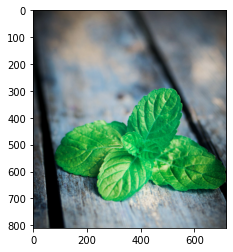

In [115]:
img = cv2.imread('x.jpg')
plt.imshow(img)
plt.show()

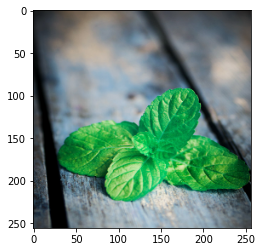

In [116]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [117]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 68ms/step


In [120]:
classes[int(yhat)]

'dhania'